# Predicting the Past, United States Extension -- CURIE Analysis: United States historic spent fuel data 

## Introduction
This is an extension of Predicting the Past, United States.
The extension includes comparisons between Cyclus output and CURIE data at year 2020 for: 
 - Total spent fuel mass 
 - Mass of major isotopes in spent fuel 

In this notebook, the preliminary analysis of CURIE data is done. 

The subsequent sections set up the CURIE data from the CURIE UDB data file: SNF_nuclide_2020_07_01.dat 

In [80]:
import numpy as np
import pandas as pd
from pandas.compat import StringIO
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pylab 
from scipy import stats

** Read .dat file (remove header from dat file)**

In [81]:
names = ['assembly_id','reactor_id', 'reactor_type', 'initial_uranium_kg','initial_enrichment','discharge_burnup','discharge_date','discharge_time','total_assembly_decay_heat_kw','name','evaluation_date','total_mass_g','total_radioactivity_curies']
df = pd.read_csv('SNF_nuclide_2020_07_01.dat',
                  sep='\s+',
                  index_col=False, 
                  names = names)

** Keep only discharge date, isotope name and total mass columns ** 

In [82]:
date_isotope_mass = df[['discharge_date','name','total_mass_g']]
date_mass = df[['discharge_date','total_mass_g']]

** Keep only discharge date, isotope name and burn up ** 

In [83]:
date_isotope_burnup = df[['discharge_date','assembly_id','reactor_id','discharge_burnup']]
date_isotope_burnup = date_isotope_burnup.drop_duplicates(subset='assembly_id',keep = 'first')
date_burnup = date_isotope_burnup[['discharge_date','discharge_burnup']]
date_burnup = date_burnup.set_index('discharge_date')

date_burnup_average = date_burnup.groupby('discharge_date').mean()

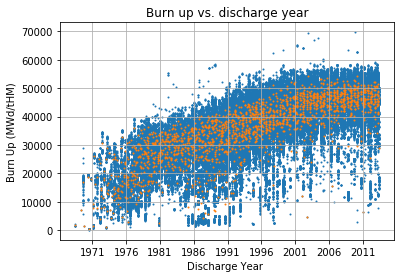

In [84]:
index = date_burnup.index.values
data = date_burnup.values
dts = pd.to_datetime(index)

index2 = date_burnup_average.index.values
data2 = date_burnup_average.values
dts2 = pd.to_datetime(index2)

plt.scatter(dts,data,s = 1)
plt.scatter(dts2,data2,s=1)

plt.grid()
plt.xlabel('Discharge Year ')
plt.ylabel('Burn Up (MWd/tHM)')
plt.title('Burn up vs. discharge year')
plt.savefig('figures/burnup.png', dpi=300)

** Spent fuel mass summed for each discharge date** 

In [85]:
spent_fuel_mass = date_mass.groupby('discharge_date').sum()
spent_fuel_mass_cum = spent_fuel_mass.cumsum()

** Plot of Cumulative spent fuel mass vs Year ** 

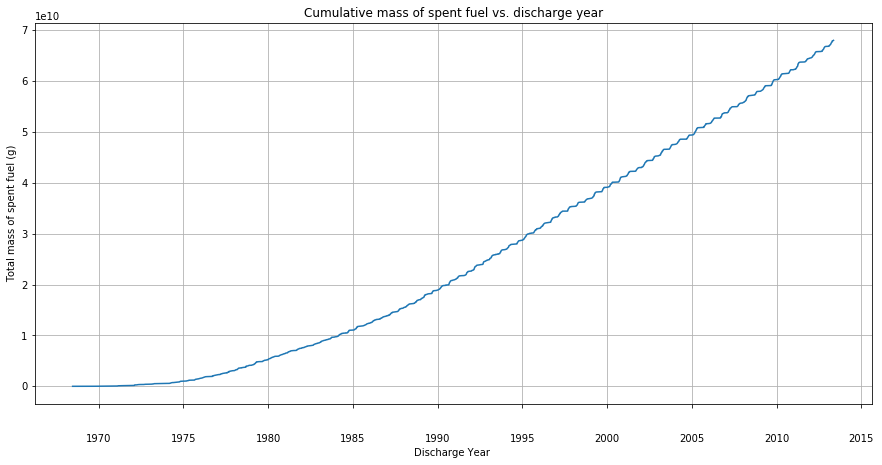

In [86]:
index = spent_fuel_mass_cum.index.values
data = spent_fuel_mass_cum.values
dts = pd.to_datetime(index)

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(dts, data)
ax.grid()
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('\n\n%Y'))
ax.set_xlabel('Discharge Year ')
ax.set_ylabel('Total mass of spent fuel (g)')
ax.set_title('Cumulative mass of spent fuel vs. discharge year')
plt.savefig('figures/cumulative_mass_spent_fuel.png', dpi=300)

In [87]:
data

array([[6.36973842e+05],
       [7.49226116e+05],
       [1.02422275e+07],
       ...,
       [6.78975777e+10],
       [6.79440391e+10],
       [6.79849746e+10]])

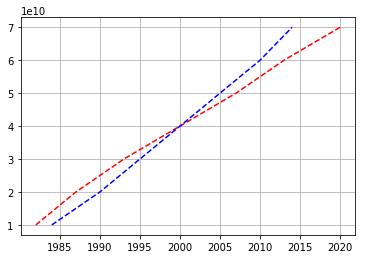

In [88]:
cyclus_year = [1982, 1987, 1993, 2000, 2007, 2013, 2020]
mass = [1e10,2e10,3e10,4e10,5e10,6e10,7e10]
curie_year =  [1984, 1990, 1995, 2000, 2005, 2010,2014]
plt.plot(cyclus_year,mass,'r--',curie_year,mass,'b--')
plt.grid()

** Rearrange table by total mass of each isotope produced for a specific discharge date** 

In [89]:
table = date_isotope_mass.pivot_table(index='discharge_date',columns='name',aggfunc=sum)
table

total_mass_g                                            \
name                  ac-227       ag-108m       ag-110m        am-241   
discharge_date                                                           
1968-06-21      3.023300e-07  1.593722e-07  1.478946e-26      6.566866   
1969-04-18      4.555560e-08  7.851460e-07  1.678221e-25     21.903593   
1969-09-06      3.143973e-06  9.234351e-04  1.444471e-22   7737.652222   
1969-10-14      7.362290e-08  1.737110e-08  4.363582e-27      0.625914   
1970-04-17      8.957648e-06  1.123117e-03  4.781970e-22  20782.085680   
1970-06-05      1.841099e-06  3.926630e-08  5.205747e-26      3.116541   
1970-10-02      7.616395e-06  8.038441e-04  5.333301e-22  15888.627530   
1971-02-04      2.141955e-06  2.312688e-05  2.973439e-23    833.388023   
1971-02-12      3.583545e-07  8.941749e-06  9.676309e-24    179.430768   
1971-02-26      1.305617e-05  1.274117e-05  2.201240e-23    612.798988   
1971-04-16      9.898955e-06  2.390440e-03  2.281371e-21  27918.587130   
1971-06-05      1.057949e-06  2.918342e-05  3.610813e-22   1524.692835   
1971-09-10      4.261761e-06  1.344088e-03  1.348546e-21  10350.280440   
1971-09-18      2.241541e-06  1.093383e-04  2.401084e-22   2609.454201   
1971-12-25      9.165970e-06  1.769953e-03  3.243565e-21  21695.591390   
1972-02-12      6.601645e-06  5.114968e-04  7.590528e-23   8998.043270   
1972-02-19      2.807257e-05  3.166260e-04  1.170178e-21  10509.233331   
1972-03-18      2.329079e-06  1.843584e-04  5.817096e-22   2367.301178   
1972-04-02      1.769692e-06  8.377664e-05  2.625607e-22   1912.627540   
1972-04-14      9.295807e-06  7.776167e-04  2.646491e-21  13686.181347   
1972-05-01      7.146855e-06  1.100871e-03  3.677407e-21  15026.954582   
1972-06-10      1.287012e-05  3.191770e-03  8.334604e-21  31237.416260   
1972-08-19      4.667374e-07  1.345323e-05  4.020470e-23    253.269834   
1972-08-25      1.511671e-06  4.515607e-05  1.716205e-21   2314.401459   
1972-09-01      1.451156e-06  8.346028e-05  4.740786e-22   1983.798037   
1972-09-30      4.126588e-06  1.040506e-03  6.469177e-21  16570.103570   
1972-10-06      5.468916e-06  1.471116e-03  7.064796e-21  18435.925060   
1972-12-29      5.637225e-06  5.756001e-04  1.450947e-22   8833.864520   
1973-01-17      5.439397e-07  1.586160e-07  1.913286e-24      6.752576   
1973-02-06      1.257852e-05  2.675080e-03  1.334187e-20  27667.285200   
...                      ...           ...           ...           ...   
2012-10-27      3.226615e-06  1.179686e-02  2.066758e-02  22896.080740   
2012-10-31      2.561431e-06  6.643847e-03  1.054807e-02  13770.119140   
2012-11-01      2.860526e-06  8.188750e-03  1.498334e-02  18377.773380   
2012-11-05      3.088225e-06  9.103233e-03  1.662936e-02  20686.489380   
2012-11-12      5.930487e-06  1.841567e-02  2.445110e-02  25531.221992   
2012-11-24      4.430886e-06  1.455545e-02  2.794036e-02  29221.126510   
2013-02-03      5.276783e-06  1.332639e-02  3.260000e-02  27012.342450   
2013-02-04      4.871392e-06  1.386995e-02  3.365670e-02  32009.390190   
2013-02-11      1.150960e-05  3.899839e-02  7.443002e-02  54252.320960   
2013-02-16      4.922413e-06  1.098504e-02  2.155798e-02  21231.379843   
2013-02-17      4.985721e-06  1.292487e-02  2.851896e-02  25111.420230   
2013-03-02      8.821436e-06  2.697335e-02  5.222434e-02  37782.321279   
2013-03-04      5.177065e-06  1.489631e-02  3.679714e-02  29545.333200   
2013-03-10      5.907207e-06  2.149570e-02  5.608506e-02  37519.577008   
2013-03-11      6.144265e-06  1.915488e-02  3.528123e-02  25801.014765   
2013-03-14      7.577166e-06  1.946880e-02  3.836499e-02  30496.148794   
2013-03-16      3.714895e-06  1.368944e-02  3.564236e-02  25699.407820   
2013-03-18      8.705129e-06  2.842171e-02  6.199270e-02  43951.788978   
2013-03-24      2.602051e-06  9.084015e-03  2.295247e-02  18723.455270   
2013-03-25      6.516521e-06  2.445004e-02  4.836700e-02  29813.976891   
2013-03-27      2.89

** Plot for non-cumulative data of each isotope** 

Text(0,0.5,'Total mass (g)')

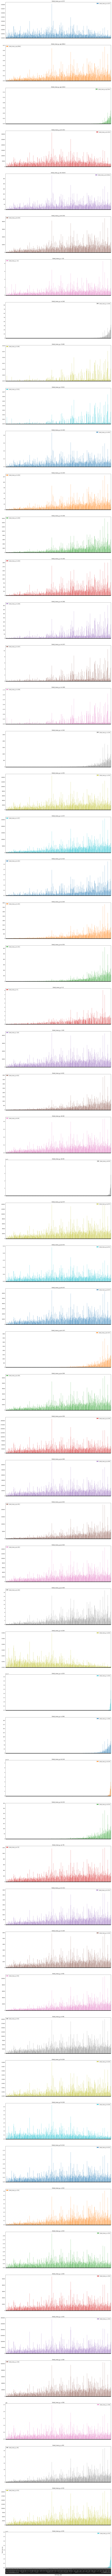

In [90]:
table.plot(figsize = (20,500), kind = 'bar', subplots = True)
plt.ylabel('Total mass (g)')

** Cumulative mass values for each isotope  ** 

In [91]:
table_cum = table.cumsum()
table_cum

total_mass_g                                            \
name                  ac-227       ag-108m       ag-110m        am-241   
discharge_date                                                           
1968-06-21      3.023300e-07  1.593722e-07  1.478946e-26  6.566866e+00   
1969-04-18      3.478856e-07  9.445182e-07  1.826116e-25  2.847046e+01   
1969-09-06      3.491859e-06  9.243796e-04  1.446297e-22  7.766123e+03   
1969-10-14      3.565482e-06  9.243970e-04  1.446341e-22  7.766749e+03   
1970-04-17      1.252313e-05  2.047514e-03  6.228311e-22  2.854883e+04   
1970-06-05      1.436423e-05  2.047554e-03  6.228832e-22  2.855195e+04   
1970-10-02      2.198062e-05  2.851398e-03  1.156213e-21  4.444058e+04   
1971-02-04      2.412258e-05  2.874525e-03  1.185948e-21  4.527397e+04   
1971-02-12      2.448093e-05  2.883466e-03  1.195624e-21  4.545340e+04   
1971-02-26      3.753710e-05  2.896208e-03  1.217636e-21  4.606620e+04   
1971-04-16      4.743606e-05  5.286648e-03  3.499008e-21  7.398478e+04   
1971-06-05      4.849401e-05  5.315831e-03  3.860089e-21  7.550948e+04   
1971-09-10      5.275577e-05  6.659919e-03  5.208635e-21  8.585976e+04   
1971-09-18      5.499731e-05  6.769257e-03  5.448743e-21  8.846921e+04   
1971-12-25      6.416328e-05  8.539210e-03  8.692308e-21  1.101648e+05   
1972-02-12      7.076492e-05  9.050707e-03  8.768213e-21  1.191628e+05   
1972-02-19      9.883749e-05  9.367333e-03  9.938391e-21  1.296721e+05   
1972-03-18      1.011666e-04  9.551691e-03  1.052010e-20  1.320394e+05   
1972-04-02      1.029363e-04  9.635468e-03  1.078266e-20  1.339520e+05   
1972-04-14      1.122321e-04  1.041308e-02  1.342915e-20  1.476382e+05   
1972-05-01      1.193789e-04  1.151396e-02  1.710656e-20  1.626651e+05   
1972-06-10      1.322490e-04  1.470573e-02  2.544116e-20  1.939026e+05   
1972-08-19      1.327158e-04  1.471918e-02  2.548137e-20  1.941558e+05   
1972-08-25      1.342275e-04  1.476433e-02  2.719757e-20  1.964702e+05   
1972-09-01      1.356786e-04  1.484780e-02  2.767165e-20  1.984540e+05   
1972-09-30      1.398052e-04  1.588830e-02  3.414083e-20  2.150241e+05   
1972-10-06      1.452741e-04  1.735942e-02  4.120562e-20  2.334601e+05   
1972-12-29      1.509113e-04  1.793502e-02  4.135072e-20  2.422939e+05   
1973-01-17      1.514553e-04  1.793518e-02  4.135263e-20  2.423007e+05   
1973-02-06      1.640338e-04  2.061026e-02  5.469450e-20  2.699680e+05   
...                      ...           ...           ...           ...   
2012-10-27      1.727829e-02  1.818797e+01  1.433671e+00  7.544695e+07   
2012-10-31      1.728085e-02  1.819461e+01  1.444219e+00  7.546072e+07   
2012-11-01      1.728371e-02  1.820280e+01  1.459202e+00  7.547910e+07   
2012-11-05      1.728680e-02  1.821190e+01  1.475831e+00  7.549979e+07   
2012-11-12      1.729273e-02  1.823032e+01  1.500283e+00  7.552532e+07   
2012-11-24      1.729716e-02  1.824487e+01  1.528223e+00  7.555454e+07   
2013-02-03      1.730244e-02  1.825820e+01  1.560823e+00  7.558155e+07   
2013-02-04      1.730731e-02  1.827207e+01  1.594480e+00  7.561356e+07   
2013-02-11      1.731882e-02  1.831107e+01  1.668910e+00  7.566781e+07   
2013-02-16      1.732374e-02  1.832205e+01  1.690468e+00  7.568904e+07   
2013-02-17      1.732873e-02  1.833498e+01  1.718987e+00  7.571415e+07   
2013-03-02      1.733755e-02  1.836195e+01  1.771211e+00  7.575194e+07   
2013-03-04      1.734273e-02  1.837685e+01  1.808008e+00  7.578148e+07   
2013-03-10      1.734863e-02  1.839834e+01  1.864093e+00  7.581900e+07   
2013-03-11      1.735478e-02  1.841750e+01  1.899374e+00  7.584480e+07   
2013-03-14      1.736236e-02  1.843697e+01  1.937739e+00  7.587530e+07   
2013-03-16      1.736607e-02  1.845066e+01  1.973382e+00  7.590100e+07   
2013-03-18      1.737478e-02  1.847908e+01  2.035374e+00  7.594495e+07   
2013-03-24      1.737738e-02  1.848816e+01  2.058327e+00  7.596367e+07   
2013-03-25      1.738389e-02  1.851261e+01  2.106694e+00  7.599349e+07   
2013-03-27      1.73

** Plot for cumulative data of each isotope ** 

In [92]:
table_cum_no_u238= table_cum.drop(('total_mass_g', 'u-238'), 1)

In [ ]:
index = table_cum.index.values
column = list(table_cum.columns.values)
data = table_cum.values
dts = pd.to_datetime(index)

for x in range(1,len(column)):
    fig, ax = plt.subplots(figsize=(15,7))
    ax.plot(dts, data[:,(x-1)])
    ax.grid()
    ax.xaxis.set_major_locator(mdates.YearLocator(5))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('\n\n%Y'))
    ax.set_xlabel('Discharge Year ')
    ax.set_ylabel('Total mass of spent fuel (g)')
    ax.set_title(str(column[x-1]) + 'Cumulative mass of spent fuel vs. discharge year')
    plt.savefig('figures/cumulative_mass_spent_fuel.png', dpi=300)

In [ ]:
table_cum.plot(figsize = (20,500), kind = 'bar', subplots = True)
plt.ylabel('Total mass (g)')

In [ ]:
table_cum.plot(figsize = (20,20))
plt.ylabel('Total mass (g)')